In [1]:
import datetime
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import seaborn as sns
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn.preprocessing import StandardScaler
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands
from ta.volume import MFIIndicator



In [2]:
days_sub = datetime.timedelta(1)
start_date = '2016-01-01'
end_date = datetime.date.today() - days_sub

In [3]:
tick = 'AAPL'

yf.pdr_override()

df_raw = pdr.get_data_yahoo(tick, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df_raw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,26.752501,26.757500,26.205000,26.315001,24.199884,163649200
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.220579,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.613628,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.151514,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.174416,324377600
...,...,...,...,...,...,...
2022-04-29,161.839996,166.199997,157.250000,157.649994,157.649994,131587100
2022-05-02,156.710007,158.229996,153.270004,157.960007,157.960007,123055300
2022-05-03,158.149994,160.710007,156.320007,159.479996,159.479996,88966500


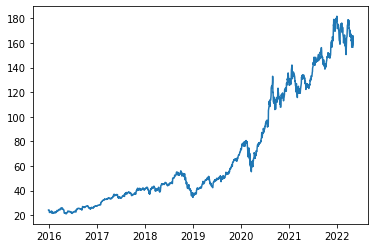

In [5]:
plt.plot(df_raw['Adj Close'])

In [6]:
df = df_raw.filter(['Adj Close'])
df

,Adj Close
Date,
2015-12-31,24.199884
2016-01-04,24.220579
2016-01-05,23.613628
2016-01-06,23.151514
2016-01-07,22.174416
...,...
2022-04-29,157.649994
2022-05-02,157.960007
2022-05-03,159.479996


In [7]:
df.index

DatetimeIndex(['2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2022-04-22', '2022-04-25', '2022-04-26', '2022-04-27',
               '2022-04-28', '2022-04-29', '2022-05-02', '2022-05-03',
               '2022-05-04', '2022-05-05'],
              dtype='datetime64[ns]', name='Date', length=1598, freq=None)

In [8]:
# form df with prev close of up to 3 days
def create_prev_close_df(df, col_name:str, days_shift: int):
    count = days_shift
    while count > 0:
        df[f"D_m{count}"] = df[col_name].shift(count)
        count -= 1
    #rearrange df with more days shift at the start -  here need to make it more dynamic
    df = df[[f"D_m{days_shift}", f"D_m{days_shift-1}", f"D_m{days_shift-2}",col_name]]
    # df = df.dropna()
    # df = df.reset_index()
    return df


In [9]:
df_main = create_prev_close_df(df, "Adj Close",3)
df_main

,D_m3,D_m2,D_m1,Adj Close
Date,,,,
2015-12-31,NaN,NaN,NaN,24.199884
2016-01-04,NaN,NaN,24.199884,24.220579
2016-01-05,NaN,24.199884,24.220579,23.613628
2016-01-06,24.199884,24.220579,23.613628,23.151514
2016-01-07,24.220579,23.613628,23.151514,22.174416
...,...,...,...,...
2022-04-29,156.800003,156.570007,163.639999,157.649994
2022-05-02,156.570007,163.639999,157.649994,157.960007
2022-05-03,163.639999,157.649994,157.960007,159.479996


In [10]:
# Calculate RSI values for each day
length = 14
rsi_calc = RSIIndicator(df['Adj Close'],length).rsi()
df_rsi = pd.DataFrame(rsi_calc)
df_rsi

,rsi
Date,
2015-12-31,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
...,...
2022-04-29,39.961846
2022-05-02,40.436708
2022-05-03,42.824495


In [11]:
# Calc MACD values for each day
macd_data = MACD(df['Adj Close']).macd()
df_macd = pd.DataFrame(macd_data)
df_macd

,MACD_12_26
Date,
2015-12-31,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
...,...
2022-04-29,-2.538138
2022-05-02,-2.738726
2022-05-03,-2.743419


In [12]:
#Calculate MFI
mfi_data = MFIIndicator(high = df_raw['High'], low = df_raw['Low'], close = df_raw['Adj Close'], volume = df_raw['Volume'], window = length).money_flow_index()
df_mfi = pd.DataFrame(mfi_data)
df_mfi

,mfi_14
Date,
2015-12-31,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
...,...
2022-04-29,42.012553
2022-05-02,40.545757
2022-05-03,40.778114


In [13]:
#Calc Bollinger Band(Volatility)
bb_data = BollingerBands(df['Adj Close']).bollinger_wband()
df_bb = pd.DataFrame(bb_data).shift(1)
df_bb

,bbiwband
Date,
2015-12-31,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
...,...
2022-04-29,13.563856
2022-05-02,14.025892
2022-05-03,14.188020


In [14]:
df_train = df_mfi.merge(df_macd, how = "left", left_index =  True, right_index=True)
# df_train = df_train.merge(df_rsi, how = "left", left_index =  True, right_index=True)
df_train = df_train.merge(df_bb, how = "left", left_index =  True, right_index=True)
df_train = df_train.shift(1)
df_backtest = df_train.iloc[-1,:]
df_train = df_train.merge(df_main, how = "left", left_index =  True, right_index=True)
df_train = df_train.dropna()
df_train = df_train.rename(columns = {'mfi_14':'mfi_m1','MACD_12_26' : 'macd_m1','bbiwband':'bb_m1'})
df_train = df_train.reset_index()


In [15]:
df_backtest

mfi_14        42.385321
MACD_12_26    -2.194122
bbiwband      12.861554
Name: 2022-05-05 00:00:00, dtype: float64

In [16]:
df_train

,Date,mfi_m1,macd_m1,bb_m1,D_m3,D_m2,D_m1,Adj Close
0,2016-02-09,32.922407,-0.397636,8.562588,22.329411,21.733032,21.961874,21.957254
1,2016-02-10,39.446546,-0.384703,8.697727,21.733032,21.961874,21.957254,21.790825
2,2016-02-11,33.464388,-0.383462,8.719459,21.961874,21.957254,21.790825,21.659067
3,2016-02-12,25.563435,-0.388630,8.469789,21.957254,21.790825,21.659067,21.726093
4,2016-02-16,31.158687,-0.382904,8.747432,21.790825,21.659067,21.726093,22.338659
...,...,...,...,...,...,...,...,...
1567,2022-04-29,43.785190,-2.213630,14.276945,156.800003,156.570007,163.639999,157.649994
1568,2022-05-02,42.012553,-2.538138,13.563856,156.570007,163.639999,157.649994,157.960007
1569,2022-05-03,40.545757,-2.738726,14.025892,163.639999,157.649994,157.960007,159.479996
1570,2022-05-04,40.778114,-2.743419,14.188020,157.649994,157.960007,159.479996,166.020004


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1572 non-null   datetime64[ns]
 1   mfi_m1     1572 non-null   float64       
 2   macd_m1    1572 non-null   float64       
 3   bb_m1      1572 non-null   float64       
 4   D_m3       1572 non-null   float64       
 5   D_m2       1572 non-null   float64       
 6   D_m1       1572 non-null   float64       
 7   Adj Close  1572 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 98.4 KB


### Test pct change of values with scaling

In [18]:
df_train['prev_close'] = df_train['Adj Close'].shift(1)
df_train

,Date,mfi_m1,macd_m1,bb_m1,D_m3,D_m2,D_m1,Adj Close,prev_close
0,2016-02-09,32.922407,-0.397636,8.562588,22.329411,21.733032,21.961874,21.957254,NaN
1,2016-02-10,39.446546,-0.384703,8.697727,21.733032,21.961874,21.957254,21.790825,21.957254
2,2016-02-11,33.464388,-0.383462,8.719459,21.961874,21.957254,21.790825,21.659067,21.790825
3,2016-02-12,25.563435,-0.388630,8.469789,21.957254,21.790825,21.659067,21.726093,21.659067
4,2016-02-16,31.158687,-0.382904,8.747432,21.790825,21.659067,21.726093,22.338659,21.726093
...,...,...,...,...,...,...,...,...,...
1567,2022-04-29,43.785190,-2.213630,14.276945,156.800003,156.570007,163.639999,157.649994,163.639999
1568,2022-05-02,42.012553,-2.538138,13.563856,156.570007,163.639999,157.649994,157.960007,157.649994
1569,2022-05-03,40.545757,-2.738726,14.025892,163.639999,157.649994,157.960007,159.479996,157.960007
1570,2022-05-04,40.778114,-2.743419,14.188020,157.649994,157.960007,159.479996,166.020004,159.479996


In [19]:
#pct change prices and bb
df_train[['bb_m1', 'D_m3', 'D_m2', 'D_m1','Adj Close']] = df_train[['bb_m1', 'D_m3', 'D_m2', 'D_m1', 'Adj Close']].pct_change()
df_train = df_train.dropna().reset_index(drop=True)
df_train

,Date,mfi_m1,macd_m1,bb_m1,D_m3,D_m2,D_m1,Adj Close,prev_close
0,2016-02-10,39.446546,-0.384703,0.015783,-0.026708,0.010530,-0.000210,-0.007580,21.957254
1,2016-02-11,33.464388,-0.383462,0.002499,0.010530,-0.000210,-0.007580,-0.006046,21.790825
2,2016-02-12,25.563435,-0.388630,-0.028634,-0.000210,-0.007580,-0.006046,0.003095,21.659067
3,2016-02-16,31.158687,-0.382904,0.032780,-0.007580,-0.006046,0.003095,0.028195,21.726093
4,2016-02-17,38.975244,-0.325188,-0.030903,-0.006046,0.003095,0.028195,0.015315,22.338659
...,...,...,...,...,...,...,...,...,...
1566,2022-04-29,43.785190,-2.213630,0.045279,-0.037328,-0.001467,0.045155,-0.036605,163.639999
1567,2022-05-02,42.012553,-2.538138,-0.049947,-0.001467,0.045155,-0.036605,0.001966,157.649994
1568,2022-05-03,40.545757,-2.738726,0.034064,0.045155,-0.036605,0.001966,0.009623,157.960007
1569,2022-05-04,40.778114,-2.743419,0.011559,-0.036605,0.001966,0.009623,0.041008,159.479996


In [20]:
#split into dates, x , y data
dates = df_train[['Date']]
x = df_train[['macd_m1', 'mfi_m1', 'bb_m1', 'D_m3', 'D_m2', 'D_m1',]]
y = df_train[['Adj Close']]
print(dates)
print(x)
print(y)

           Date
0    2016-02-10
1    2016-02-11
2    2016-02-12
3    2016-02-16
4    2016-02-17
...         ...
1566 2022-04-29
1567 2022-05-02
1568 2022-05-03
1569 2022-05-04
1570 2022-05-05

[1571 rows x 1 columns]
       macd_m1     mfi_m1     bb_m1      D_m3      D_m2      D_m1
0    -0.384703  39.446546  0.015783 -0.026708  0.010530 -0.000210
1    -0.383462  33.464388  0.002499  0.010530 -0.000210 -0.007580
2    -0.388630  25.563435 -0.028634 -0.000210 -0.007580 -0.006046
3    -0.382904  31.158687  0.032780 -0.007580 -0.006046  0.003095
4    -0.325188  38.975244 -0.030903 -0.006046  0.003095  0.028195
...        ...        ...       ...       ...       ...       ...
1566 -2.213630  43.785190  0.045279 -0.037328 -0.001467  0.045155
1567 -2.538138  42.012553 -0.049947 -0.001467  0.045155 -0.036605
1568 -2.738726  40.545757  0.034064  0.045155 -0.036605  0.001966
1569 -2.743419  40.778114  0.011559 -0.036605  0.001966  0.009623
1570 -2.194122  42.385321 -0.093492  0.001966  0.009623  

In [21]:
#Train-val-test split
pct_lm = int(len(df_train)*0.85) 
pct_um = int(len(df_train)*0.92) 

dates_train, x_train, y_train = dates.loc[:pct_lm-1],x.loc[:pct_lm-1], y.loc[:pct_lm-1]
dates_val,x_val, y_val = dates.loc[pct_lm:pct_um-1],x.loc[pct_lm:pct_um-1], y.loc[pct_lm:pct_um-1]
dates_test,x_test, y_test = dates.loc[pct_um:],x.loc[pct_um:], y.loc[pct_um:]

In [22]:
dates_val,x_val, y_val

(           Date
 1335 2021-06-01
 1336 2021-06-02
 1337 2021-06-03
 1338 2021-06-04
 1339 2021-06-07
 ...         ...
 1440 2021-10-28
 1441 2021-10-29
 1442 2021-11-01
 1443 2021-11-02
 1444 2021-11-03
 
 [110 rows x 1 columns],
        macd_m1     mfi_m1     bb_m1      D_m3      D_m2      D_m1
 1335 -0.971316  34.399851 -0.122817 -0.000394 -0.012377 -0.005348
 1336 -1.055460  36.208744 -0.065062 -0.012377 -0.005348 -0.002648
 1337 -1.047397  43.507457 -0.169261 -0.005348 -0.002648  0.006276
 1338 -1.149885  34.551544 -0.002019 -0.002648  0.006276 -0.012154
 1339 -1.030405  34.046975  0.029008  0.006276 -0.012154  0.019022
 ...        ...        ...       ...       ...       ...       ...
 1440  0.961728  52.259526  0.044589 -0.000336  0.004575 -0.003148
 1441  1.308292  60.518433  0.030131  0.004575 -0.003148  0.024992
 1442  1.344541  56.754617  0.084937 -0.003148  0.024992 -0.018156
 1443  1.290793  63.821537  0.015295  0.024992 -0.018156 -0.005607
 1444  1.318301  71.008811 -0.07

In [23]:
#Scale the other indicators with standard scaler
ss = StandardScaler()

x_train_ss = pd.DataFrame(ss.fit_transform(x_train[['macd_m1', 'mfi_m1']]), columns=['ssmacd_m1', 'ssmfi_m1'])
x_val_ss = pd.DataFrame(ss.fit_transform(x_val[[ 'macd_m1', 'mfi_m1']]), columns=['ssmacd_m1', 'ssmfi_m1'])
x_test_ss = pd.DataFrame(ss.fit_transform(x_test[[ 'macd_m1', 'mfi_m1']]), columns=[ 'ssmacd_m1', 'ssmfi_m1'])

In [24]:
x_train = x_train.merge(right=x_train_ss,how='left',left_index =  True, right_index= True)
x_train = x_train.drop(['macd_m1', 'mfi_m1'], axis =1)

x_train

,bb_m1,D_m3,D_m2,D_m1,ssmacd_m1,ssmfi_m1
0,0.015783,-0.026708,0.010530,-0.000210,-0.647554,-1.000679
1,0.002499,0.010530,-0.000210,-0.007580,-0.646694,-1.386587
2,-0.028634,-0.000210,-0.007580,-0.006046,-0.650278,-1.896275
3,0.032780,-0.007580,-0.006046,0.003095,-0.646307,-1.535327
4,-0.030903,-0.006046,0.003095,0.028195,-0.606281,-1.031083
...,...,...,...,...,...,...
1330,-0.005758,-0.001282,0.021012,-0.014767,-1.145417,-0.973029
1331,-0.031437,0.021012,-0.014767,0.013314,-1.064800,-0.469951
1332,-0.075724,-0.014767,0.013314,-0.001574,-1.004860,-0.507130
1333,-0.092687,0.013314,-0.001574,-0.000394,-0.953541,-0.887325


<AxesSubplot:>

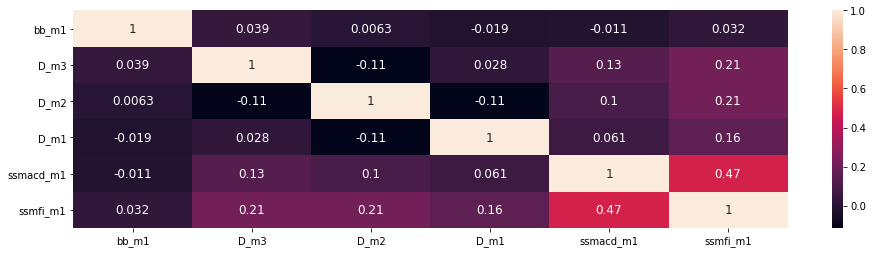

In [25]:
plt.figure(figsize=(16,4))
sns.heatmap(x_train.corr(),annot =True, annot_kws={"fontsize":12})

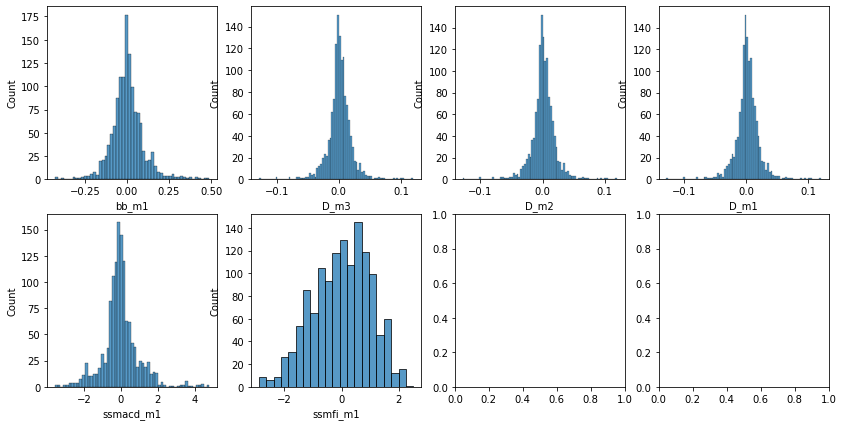

In [26]:
fig,axis = plt.subplots(2,4,figsize=(14,7))
sns.histplot(x_train.iloc[:,0],ax = axis[0,0])
sns.histplot(x_train.iloc[:,1],ax = axis[0,1])
sns.histplot(x_train.iloc[:,2],ax = axis[0,2])
sns.histplot(x_train.iloc[:,3],ax = axis[0,3])
sns.histplot(x_train.iloc[:,4],ax = axis[1,0])
sns.histplot(x_train.iloc[:,5],ax = axis[1,1])
# sns.histplot(x_train.iloc[:,6],ax = axis[1,2])
# sns.histplot(x_train.iloc[:,8],ax = axis[1,3])

plt.show()

In [27]:
x_val = x_val.reset_index(drop=True).merge(x_val_ss,how='left',left_index =  True, right_index= True).drop(['macd_m1', 'mfi_m1'], axis =1)
x_val


,bb_m1,D_m3,D_m2,D_m1,ssmacd_m1,ssmfi_m1
0,-0.122817,-0.000394,-0.012377,-0.005348,-1.167631,-1.390060
1,-0.065062,-0.012377,-0.005348,-0.002648,-1.213541,-1.263512
2,-0.169261,-0.005348,-0.002648,0.006276,-1.209142,-0.752906
3,-0.002019,-0.002648,0.006276,-0.012154,-1.265062,-1.379447
4,0.029008,0.006276,-0.012154,0.019022,-1.199871,-1.414746
...,...,...,...,...,...,...
105,0.044589,-0.000336,0.004575,-0.003148,-0.112923,-0.140624
106,0.030131,0.004575,-0.003148,0.024992,0.076170,0.437156
107,0.084937,-0.003148,0.024992,-0.018156,0.095948,0.173845
108,0.015295,0.024992,-0.018156,-0.005607,0.066622,0.668236


In [28]:
x_test = x_test.reset_index(drop = True).merge(x_test_ss,how='left',left_index =  True, right_index= True).drop(['macd_m1', 'mfi_m1'], axis =1)
x_test

,bb_m1,D_m3,D_m2,D_m1,ssmacd_m1,ssmfi_m1
0,-0.034135,-0.005607,0.007116,0.009799,0.116154,1.135079
1,-0.008835,0.007116,0.009799,-0.003499,0.130306,1.127703
2,-0.008817,0.009799,-0.003499,0.003582,0.151098,0.721666
3,-0.022587,-0.003499,0.003582,-0.005553,0.136065,0.355524
4,-0.053766,0.003582,-0.005553,0.002459,0.128900,0.353140
...,...,...,...,...,...,...
121,0.045279,-0.037328,-0.001467,0.045155,-1.240009,-0.355439
122,-0.049947,-0.001467,0.045155,-0.036605,-1.360401,-0.453734
123,0.034064,0.045155,-0.036605,0.001966,-1.434820,-0.535070
124,0.011559,-0.036605,0.001966,0.009623,-1.436561,-0.522185


### 6. Create Previous close price for computing predicted price

In [29]:
df_prev = df_train[['prev_close']]

#Splitting the previous close price data to convert prediction back to price data for comparison
prev_train, prev_val, prev_test = df_prev.loc[:pct_lm-1],df_prev.loc[pct_lm:pct_um-1], df_prev.loc[pct_um:]
prev_train, prev_val, prev_test

(      prev_close
 0      21.957254
 1      21.790825
 2      21.659067
 3      21.726093
 4      22.338659
 ...          ...
 1330  124.900703
 1331  126.563652
 1332  126.364502
 1333  126.314713
 1334  124.751335
 
 [1335 rows x 1 columns],
       prev_close
 1335  124.084167
 1336  123.755562
 1337  124.532265
 1338  123.018684
 1339  125.358765
 ...          ...
 1440  148.443954
 1441  152.153809
 1442  149.391357
 1443  148.553650
 1444  149.610764
 
 [110 rows x 1 columns],
       prev_close
 1445  151.076767
 1446  150.548203
 1447  151.087509
 1448  150.248581
 1449  150.618103
 ...          ...
 1566  163.639999
 1567  157.649994
 1568  157.960007
 1569  159.479996
 1570  166.020004
 
 [126 rows x 1 columns])